####  Exploit the temporal information of the dataset preparing it for a univariate framework of analysis, i.e. select a feature and use it as your time series. You are welcome in using more than one reliable temporal split to have more time series of the same feature. You are welcome in creating more than a dataset using more than a feature and report the result on the feature you prefer or more than one. Analyze such datasets for finding motifs and/or anomalies and shaplets. Visualize and discuss them and their relationship with the class of the time series.

In [86]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

In [87]:
df = pd.read_csv('/Users/marco/Desktop/DataMining2Project-master-2/dataset_train+test2.csv')

In [88]:
df.head()

,date,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,hour,absH,weekend,out_of_turn
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,1,2,4,17:51:00,17,0.0,1.0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,1,2,4,17:51:59,17,0.0,1.0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,1,2,4,17:53:00,17,0.0,1.0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,1,2,4,17:54:00,17,0.0,1.0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,1,2,4,17:55:00,17,0.0,1.0


In [89]:
dateparse = lambda dates: pd.datetime.strptime(dates, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv('/Users/marco/Desktop/DataMining2Project-master-2/dataset_train+test2.csv', 
                 parse_dates=True, index_col='date', date_parser=dateparse)
df.head()

,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,hour,absH,weekend,out_of_turn
date,,,,,,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,1,2,4,17:51:00,17,0.0,1.0
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,1,2,4,17:51:59,17,0.0,1.0
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,1,2,4,17:53:00,17,0.0,1.0
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,1,2,4,17:54:00,17,0.0,1.0
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,1,2,4,17:55:00,17,0.0,1.0


In [90]:
del df["hour"]

### Normalization

In [91]:
scaler = MinMaxScaler()
X=scaler.fit_transform(df[["Temperature","Humidity","Light", "CO2", "Ora", "absH"]].values)
i=0

for col in df[["Temperature","Humidity","Light", "CO2", "Ora", "absH"]]:
    df[col] = X[:,i]
    i+=1
X = df
df.head()

,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,absH,weekend,out_of_turn
date,,,,,,,,,,
2015-02-04 17:51:00,0.775510,0.462624,0.269450,0.185424,1,0.5,4,0.73913,0.0,1.0
2015-02-04 17:51:59,0.769944,0.462426,0.271664,0.181067,1,0.5,4,0.73913,0.0,1.0
2015-02-04 17:53:00,0.769944,0.461437,0.269450,0.180766,1,0.5,4,0.73913,0.0,1.0
2015-02-04 17:54:00,0.769944,0.459459,0.269450,0.177611,1,0.5,4,0.73913,0.0,1.0
2015-02-04 17:55:00,0.760668,0.459459,0.269450,0.175357,1,0.5,4,0.73913,0.0,1.0


In [92]:
df.describe()

,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,absH,weekend,out_of_turn
count,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000,17895.0
mean,0.339094,0.494561,0.076820,0.164526,0.211120,0.599078,11.123107,0.497657,0.160939,1.0
std,0.192325,0.227198,0.127898,0.188532,0.408115,0.398235,4.138432,0.306918,0.367485,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.0
25%,0.204082,0.357943,0.000000,0.027648,0.000000,0.500000,7.000000,0.217391,0.000000,1.0
50%,0.300557,0.485533,0.000000,0.090909,0.000000,0.500000,12.000000,0.478261,0.000000,1.0
75%,0.463822,0.664105,0.137824,0.227949,0.000000,1.000000,15.000000,0.782609,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0


# time series

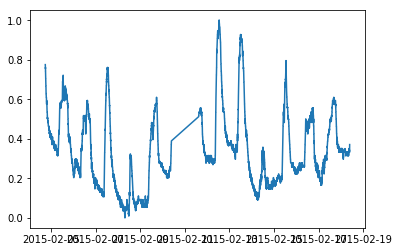

In [93]:
ts = df['Temperature']
plt.plot(ts)
plt.show()

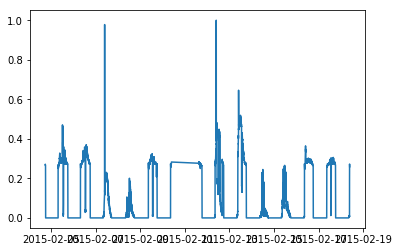

In [94]:
ts = df['Light']
plt.plot(ts)
plt.show()

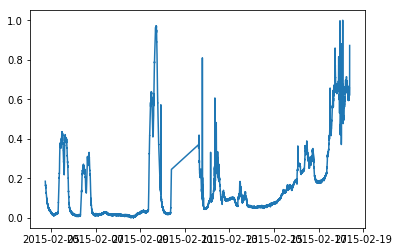

In [95]:
ts = df['CO2']
plt.plot(ts)
plt.show()

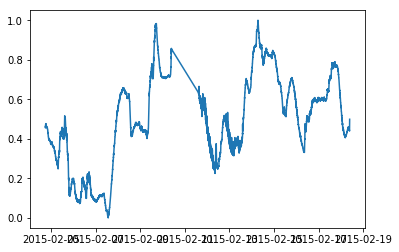

In [128]:
ts = df['Humidity']
plt.plot(ts)
plt.show()

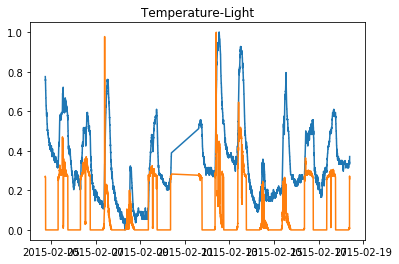

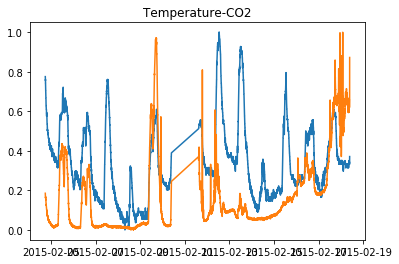

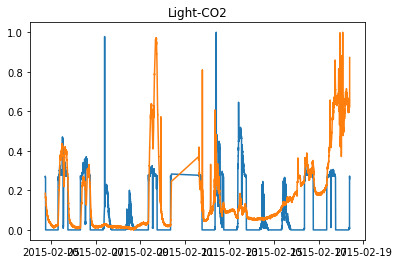

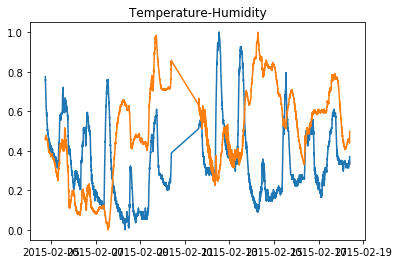

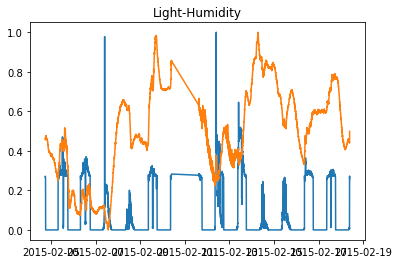

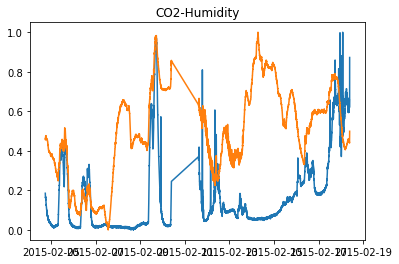

In [137]:
ts1 = df['Temperature']
ts2 = df['Light']
plt.plot(ts1)
plt.plot(ts2)
plt.title("Temperature-Light")
plt.show()


ts3 = df['CO2']
plt.plot(ts1)
plt.plot(ts3)
plt.title("Temperature-CO2")
plt.show()


plt.plot(ts2)
plt.plot(ts3)
plt.title("Light-CO2")
plt.show()

ts4 = df['Humidity']
plt.plot(ts1)
plt.plot(ts4)
plt.title("Temperature-Humidity")
plt.show()

plt.plot(ts2)
plt.plot(ts4)
plt.title("Light-Humidity")
plt.show()

plt.plot(ts3)
plt.plot(ts4)
plt.title("CO2-Humidity")
plt.show()

Già ad occhio si vede che c'è correlazione tra luce e temperatura. Quando aumenta una, aumenta anche l'atra. come presumibile. 

# trasformations

### Transformation I: Offset Translation

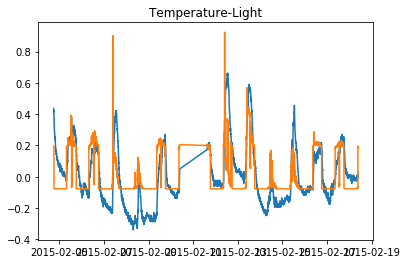

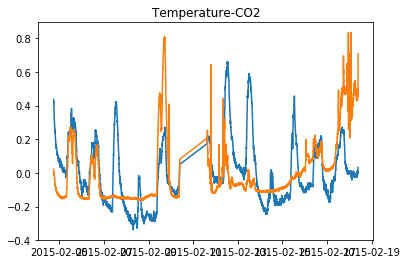

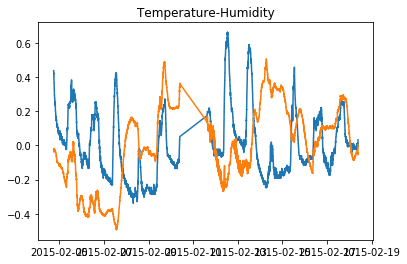

In [154]:
plt.plot(ts1 - ts1.mean())
plt.plot(ts2 - ts2.mean())
plt.title("Temperature-Light")
plt.show()

plt.plot(ts1 - ts1.mean())
plt.plot(ts3 - ts3.mean())
plt.title("Temperature-CO2")
plt.show()

plt.plot(ts1 - ts1.mean())
plt.plot(ts4 - ts4.mean())
plt.title("Temperature-Humidity")
plt.show()

OFFSET TRASFORMATION porta su uno stesso livello le due time series, sottraendo ad ogni punto la media della time series a cui appartiene. Il plot delle due time series è più simile dopo la trasformazione

### Transformation II: Amplitude Scaling

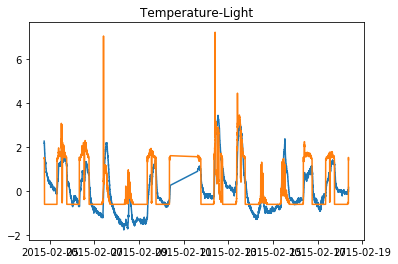

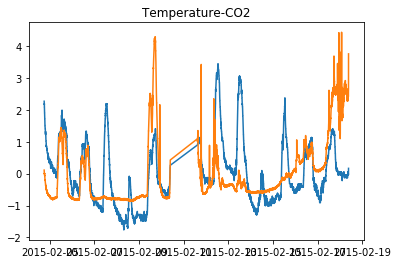

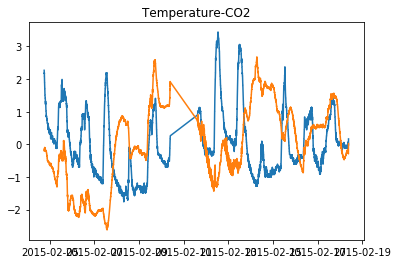

In [155]:
plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.title("Temperature-Light")
plt.show()

plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts3 - ts3.mean())/ts3.std())
plt.title("Temperature-CO2")
plt.show()

plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts4 - ts4.mean())/ts3.std())
plt.title("Temperature-CO2")
plt.show()

In questa trasformazione, ogni nuovo punto della time series è il risultato tra la differenza del pt originario e la media, tutto diviso per la standard deviation.

In [140]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [141]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

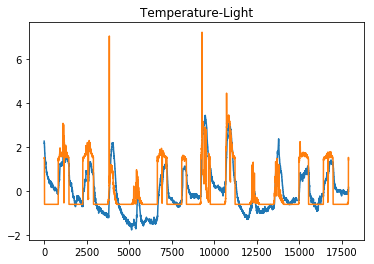

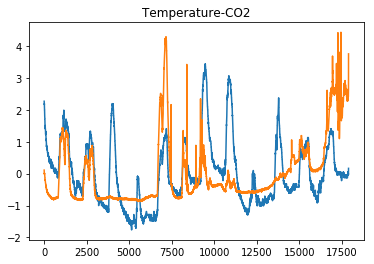

In [142]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(ts1).flatten()
ts2_scaled = scaler.fit_transform(ts2).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.title("Temperature-Light")
plt.show()



scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(ts1).flatten()
ts3_scaled = scaler.fit_transform(ts3).flatten()

plt.plot(ts1_scaled)
plt.plot(ts3_scaled)
plt.title("Temperature-CO2")
plt.show()

### Transformation IV: Noise (smoothing)

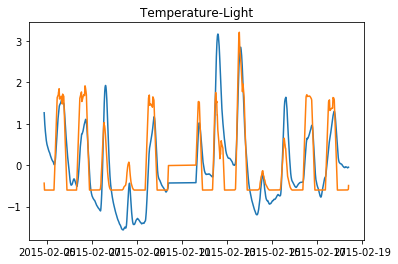

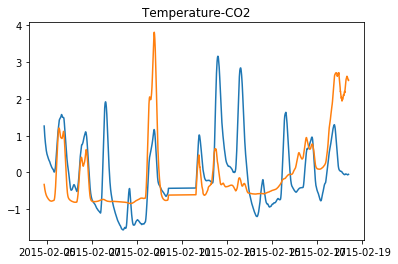

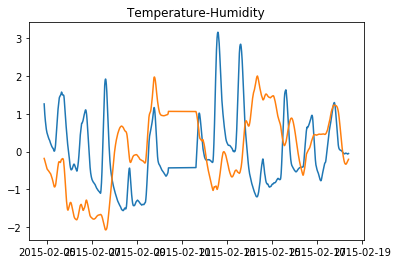

In [156]:
w = 200
plt.plot(((ts1 - ts1.mean())/ts1.std()).rolling(window=w).mean())
plt.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean())
plt.title("Temperature-Light")
plt.show()

w = 200
plt.plot(((ts1 - ts1.mean())/ts1.std()).rolling(window=w).mean())
plt.plot(((ts3 - ts3.mean())/ts3.std()).rolling(window=w).mean())
plt.title("Temperature-CO2")
plt.show()

w = 200
plt.plot(((ts1 - ts1.mean())/ts1.std()).rolling(window=w).mean())
plt.plot(((ts4 - ts4.mean())/ts4.std()).rolling(window=w).mean())
plt.title("Temperature-Humidity")
plt.show()

#rolling è una funzione disponibile per le time series, che applica una finestra(moving) di lunghezza w
# l'operazione che faccio nella finestra è la media. c'è da capire il valore ottimale per w
# in pratica rimuove i noise sostituendo ad un data point il valore della media dei suoi vicini
#per questo si prende una finestra temporale

### Transformation III: Trend removal

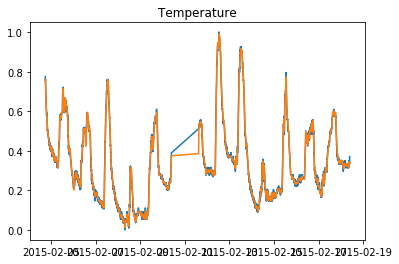

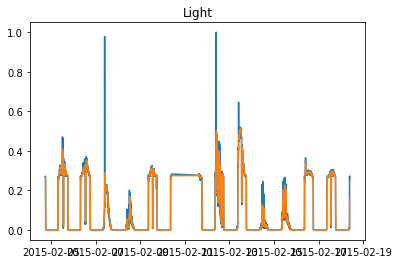

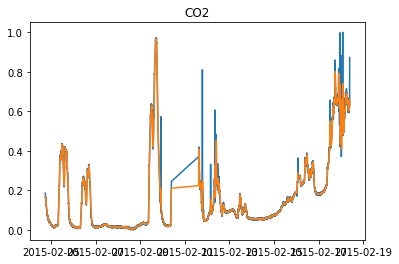

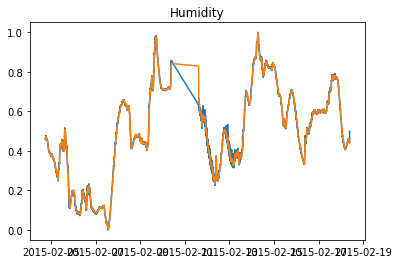

In [163]:
plt.plot(ts1)
plt.plot(ts1.rolling(window=15).mean())
plt.title("Temperature")
plt.show()

plt.plot(ts2)
plt.plot(ts2.rolling(window=15).mean())
plt.title("Light")
plt.show()

plt.plot(ts3)
plt.plot(ts3.rolling(window=15).mean())
plt.title("CO2")
plt.show()

plt.plot(ts4)
plt.plot(ts4.rolling(window=15).mean())
plt.title("Humidity")
plt.show()

# w è la finestra temporale che vogliamo considerare. w potrebbe essere il numero dei giorni. in questo caso 15

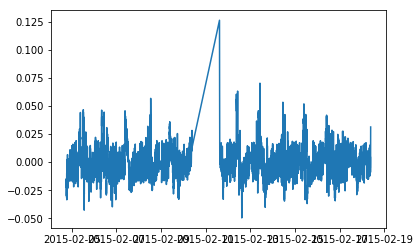

In [145]:
ts1_shift = ts1 - ts1.rolling(window=15).mean()
plt.plot(ts1_shift)
plt.show()
#penso non ne valga la pena fare una trasformazione per il trend in questo caso

# distances


### Euclidean Distance

In [146]:
from scipy.spatial.distance import euclidean

In [153]:
dist = euclidean(ts1, ts2)
print("Temperature-Light: ", dist)
print()
dist = euclidean(ts1, ts3)
print("Temperature-CO2:   ", dist)
print()
dist = euclidean(ts1, ts4)
print("Temperature-Humidity: ", dist)

Temperature-Light:  39.93722586204157

Temperature-CO2:    36.48288171776669

Temperature-Humidity:  48.08414384794499


In [148]:
dist = euclidean(ts1[:100], ts2[:100])
print("Temperature-Light: ", dist)
print()
dist = euclidean(ts1[:100], ts3[:100])
print("Temperature-CO2:   ", dist)

#qui rispetto ai primi 100 valori

Temperature-Light:  6.164511257419401

Temperature-CO2:    5.204767896731084


### Manhattan Distance

In [149]:
from scipy.spatial.distance import cityblock

In [150]:
dist = cityblock(ts1, ts2)
print("Temperature-Light: ", dist)
print()
dist = cityblock(ts1, ts3)
print("Temperature-CO2: ", dist)



Temperature-Light:  4708.979436007052

Temperature-CO2:  3860.0132924914524


In [151]:
dist = cityblock(ts1[:100], ts2[:100])
print("Temperature-Light: ", dist)
print()
dist = cityblock(ts1[:100], ts3[:100])
print("Temperature-CO2: ", dist)

Temperature-Light:  61.2657587961871

Temperature-CO2:  51.90149828526451


STIAMO FACENDO UN CONFRONTO POINT-TO-POINT

# Dynamic Time Warping

In [158]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [159]:
dist = dtw(ts1, ts2)
print("Temperature-Light: ",dist)

dist = dtw(ts1, ts3)
print("Temperature-CO2: ",dist)

dist = dtw(ts1, ts4)
print("Temperature-Humidity: ",dist)


Temperature-Light:  21.877396011149067
Temperature-CO2:  17.79148067955425
Temperature-Humidity:  13.244012655096475


In [177]:
dist = dtw(ts1[:100], ts2[:100])
print("Temperature-Light: ",dist)
dist = dtw(ts1[:100], ts3[:100])
print("Temperature-CO2: ",dist)
dist = dtw(ts1[:100], ts4[:100])
print("Temperature-Humidity: ",dist)

Temperature-Light:  6.164511257419405
Temperature-CO2:  5.204767896731085
Temperature-Humidity:  2.005677460657343


# Humidity

In [209]:
path, dist = dtw_path(ts1[:3000], ts4[:3000])

In [210]:
from scipy.spatial.distance import cdist

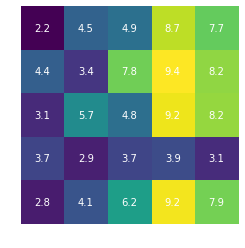

In [215]:
mat = cdist(ts1.values[:3000].reshape(-600,600), ts4.values[:3000].reshape(-600,600))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

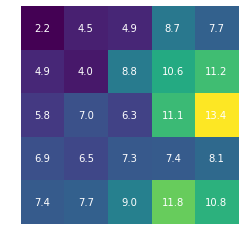

In [216]:
acc = subsequence_cost_matrix(ts1.values[:3000].reshape(-600,600), ts4.values[:3000].reshape(-600,600))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

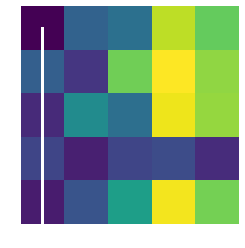

In [219]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

# Light

In [194]:
path, dist = dtw_path(ts1[:100], ts2[:100])

In [196]:
from scipy.spatial.distance import cdist

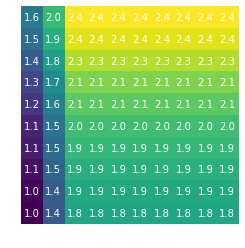

In [197]:
mat = cdist(ts1.values[:100].reshape(-10,10), ts2.values[:100].reshape(-10,10))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

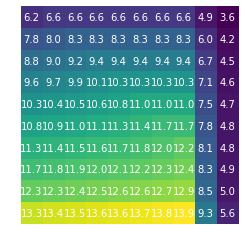

In [198]:
acc = subsequence_cost_matrix(ts1.values[:1000].reshape(-100,100), ts2.values[:1000].reshape(-100,100))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

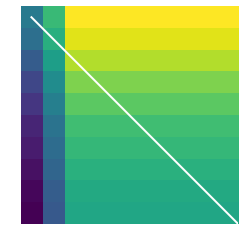

In [200]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=2.)
plt.show()